In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tqdm

from tqdm import tqdm

In [21]:
build_data = False

class DogsvsCats():
    
    img_size = 50
    cats = '/Users/varun/documents/deep_learning/Learn_PYTORCH/PetImages/Cat'
    dogs = '/Users/varun/documents/deep_learning/Learn_PYTORCH/PetImages/Dog'
    labels = {cats:0,dogs:1}
    train_data = []
    catcount = 0
    dogcount = 0

    def make_training_data(self):

        for label in self.labels:

            for f in tqdm(os.listdir(label)):
                    try:
                        path = os.path.join(label,f)
                        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img,(img_size,img_size))
                        ids = np.eye(2)[self.labels[label]]
                        train_data.append([np.array(img),ids])

                        if label == self.cats:
                                self.catcount +=1
                        else:
                                self.dogcount +=1
                    except Exception as e:
                        pass

            np.random.shuffle(train_data)
            np.save("train_data.npy",train_data)

            print(f"DOGS:  {self.dogcount}")
            print(f"CATS:  {self.catcount}")

if build_data:
    dogsvscats = DogsvsCats()
    dogsvscats.make_training_data()
else:
    train_data = np.load("train_data.npy",allow_pickle = True)

[0. 1.]


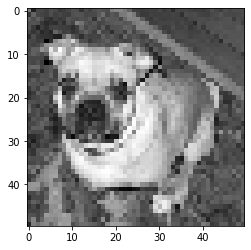

In [31]:
plt.imshow(train_data[0][0],cmap = "gray")
print(train_data[0][1])

[1. 0.]


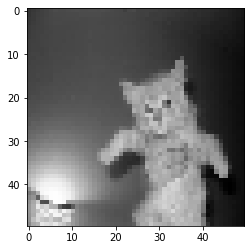

In [32]:
plt.imshow(train_data[1][0],cmap = "gray")
print(train_data[1][1])